<a href="https://colab.research.google.com/github/satishchaudhary382/satish/blob/master/MACD%20Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import ta

In [0]:
df = pd.read_csv("/content/adbl.txt", sep = '\t', parse_dates = ['Date'])
df.set_index("Date", inplace = True)

In [0]:
from ta.trend import MACD
m = MACD(df.Close)
df['MACD'] = m.macd()
df['MACD_signal'] = m.macd_signal()
df['MACD_diff'] = m.macd_diff()

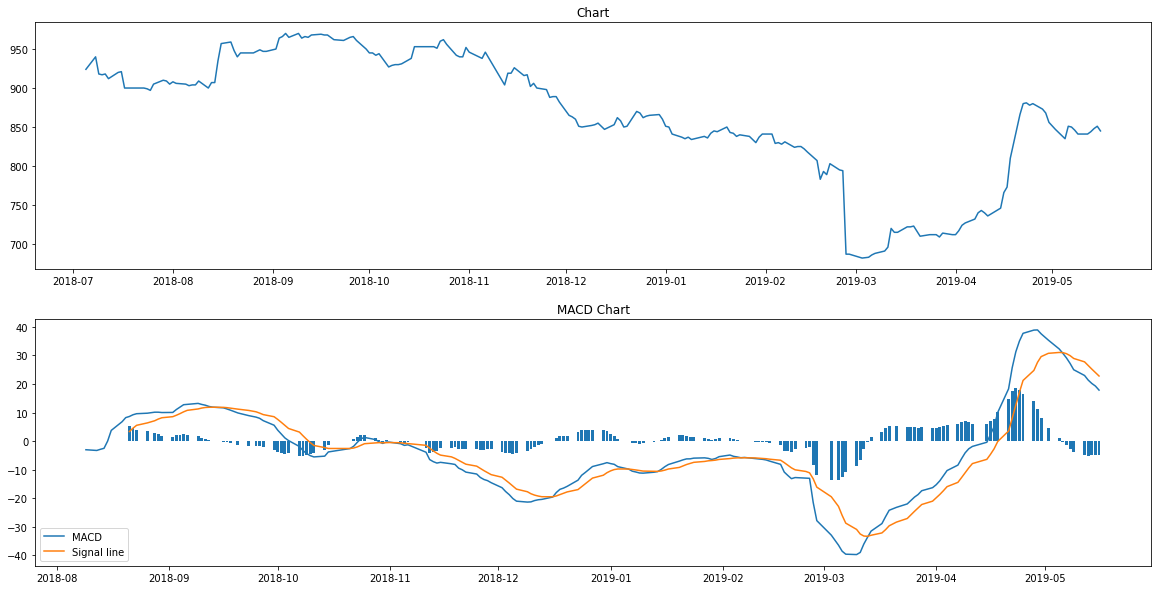

In [246]:
#plt.figure(figsize = (20,10))
fig, axs = plt.subplots(2,figsize = (20,10))
axs[0].plot(df.Close, label = 'Price')
axs[0].set_title("Chart")
axs[1].set_title("MACD Chart")
axs[1].plot(df.MACD, label = 'MACD')
axs[1].plot(df.MACD_signal, label = 'Signal line')
axs[1].bar(df.index, df.MACD_diff)
plt.legend()

In [0]:
def strategy(df):
  if df['MACD'] > df['MACD_signal']:
    return 1
  elif df['MACD'] < df['MACD_signal']:
    return -1
  else:
    return 0


In [0]:
d = df
s = np.array(d.apply(strategy, axis = 1))

In [0]:
q = []
for i in range(1, len(s)):
  if s[i-1]==s[i]:
    q.append(0)
  else:
    q.append(s[i])


In [0]:
q.insert(-1,0)
signal = np.array(q)

In [0]:
df['signal'] = signal

In [0]:
def text(df):
  if df['signal']== 1:
    return "Buy"
  elif df['signal'] == -1:
    return "Sell"
  else:
    return "Hold"

In [253]:
df['signal_text'] = df.apply(text, axis = 1)
np.array(df['signal_text'])

array(['Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Sell', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Buy', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Sell', 'Buy', 'Hold', 'Sell',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Buy', 'Hold', 'Hold', 'Hold',
       'Ho

In [0]:
b = 10000
def run(buy, sell, b):
  initial_money = b
  for i in range(len(df)):
    if df['signal_text'][i] =="Buy":
      b-=df['Close'][i]*buy
      print(f'At date {df.index[i]} {buy} unit of stock was bought. Balance {b}')
    elif df['signal_text'][i] == "Sell":
      b+=df['Close'][i]*sell
      print(f'At date {df.index[i]} {sell} unit of stock was Sold. Balance {b}')
    else:
      print(f"Hold constant, Balance {b}")
  print(f'The return on investment is {round(((b-initial_money)/initial_money)*100,2)}% over {df.index[-1] - df.index[0]}')

In [255]:
run(100,100, 100000)

Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
At date 2018-08-20 00:00:00 100 unit of 

In [210]:
10000/432

23.14814814814815